In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = '/content/drive/MyDrive/dataset'

#Load data file UDP, UDPLag, Portmap, Syn



In [ ]:
# csv_file = Path + '/Syn.csv'
# chunksize = 10000
# chunks = []
# for chunk in pd.read_csv(csv_file, chunksize=chunksize):
#         chunks.append(chunk)
# data_syn = pd.concat(chunks)
# del chunks

In [ ]:
csv_file_udp = Path + '/UDP.csv'
chunksize = 10000
chunks = []
for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
    chunks.append(chunk)
data_udp = pd.concat(chunks)
del chunks

<ipython-input-4-4b7acfd52a2a>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
<ipython-input-4-4b7acfd52a2a>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
<ipython-input-4-4b7acfd52a2a>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
<ipython-input-4-4b7acfd52a2a>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
<ipython-input-4-4b7acfd52a2a>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_udp, chunksize=chunksize):
<ipython-i

In [ ]:
# List of different dataset paths
data_udplag = pd.read_csv(Path + '/UDPLag.csv')
data_portmap = pd.read_csv(Path + '/Portmap.csv')

dataset_paths = [data_udp, data_udplag, data_portmap]

<ipython-input-5-e500ae532568>:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_udplag = pd.read_csv(Path + '/UDPLag.csv')
<ipython-input-5-e500ae532568>:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_portmap = pd.read_csv(Path + '/Portmap.csv')


Lists to store performance results

In [ ]:
accuracies = []
f1_scores = []

# Feature extraction

In [ ]:
import numpy as np
for data in dataset_paths:

    # Select features and labels
    X = data[[' Total Fwd Packets', 'Total Length of Fwd Packets', ' Flow Duration', ' Flow Packets/s']]
    y = data[' Label']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # print(np.isinf(X_train).sum())
    # print(np.max(X_train))
    # print(np.isinf(X_test).sum())
    # print(np.max(X_test))

    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)

    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # PCA for feature reduction
    pca = PCA(n_components=4)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=30, random_state=42)

    # Train the classifier
    rf.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_pca)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Print results for each dataset

In [ ]:
# Extract dataset names
dataset_names = ['UDP','UDPLag', 'Portmap']

In [ ]:
for i, dataset in enumerate(dataset_paths):
    dataset_name = dataset_names[i]
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracies[i]}, F1-score: {f1_scores[i]}")
    print()

Dataset: UDP
Accuracy: 0.9984321335938512, F1-score: 0.9984013370802151

Dataset: UDPLag
Accuracy: 0.9982141995270042, F1-score: 0.9982059668901001

Dataset: Portmap
Accuracy: 0.9995826703878558, F1-score: 0.9995831070099517



# Create plots to compare performance

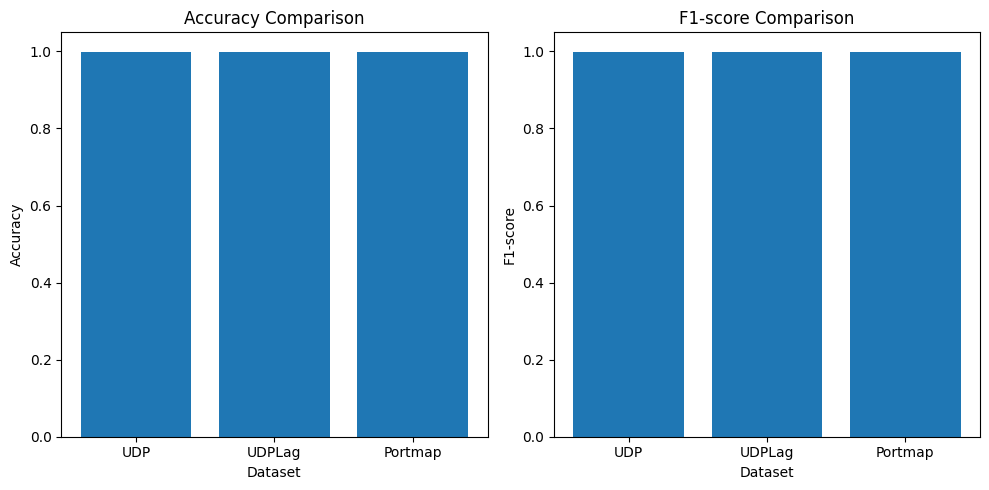

In [ ]:
# Create plots to compare performance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(dataset_names, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(dataset_names, f1_scores)
plt.xlabel('Dataset')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')

plt.tight_layout()
plt.show()